# Data Wrangling Project

## By Faouzi NAJEH

### Table contents
<ul> 
    <li>.Introduction & Project Details</li>
    <li>1.Data Gathering</li>
    <li>3.Data Assessing</li>
    <li>4.Data Cleaning</li>
    <li>4.Data Sorting & Visualization</li>
    <li>5.Resources</li>
</ul>

## Introduction

Nowadays, data is the almost the main support we have to get answer the why's and how's when developing especially in business decision and performance improvements of systems. Data and its sources become mucher every day and in reality data is not that perfect that we may expect, it is really unstructured and maybe dirty and can take many different types. This where data wrangling called in, to first decide about the convenient data sources and then gather, assess and clean data to get finally a tidy, clean  informations about the subject of interest to allow apply analysis, modelling and various visualization technics to get insights and observations that can maybe helpful when take business decisions, devolopping.

This Project is an example of a data wrangling process and go on four parts for respectively gathering, assessing, cleaning and analysis&visulization for the twitter archive dataset.

The data is a tweet archive about dogs on the twitter account '@Weratedogs' that rates pretty dogs from all around the world by a denominator of 10.

## Project Details

Through this project we will not cover a full assessing and cleaning process to the entire dataset which would require much more effort so we will only work on a little set of ten issues (eight quality issues and two tidiness issues at minimum) needed to be assessed and cleaned.The tasks for this project were:

1. Data wrangling, which consists of:
  - Gathering data.
  - Assessing data.
  - Cleaning data.
2. Storing, analyzing, and visualizing our wrangled data.
3. Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations.

## Gathering Data 

### Enhanced Twitter Archive

The WeRateDogs Twitter archive provided by Udacity. This first dataste contains basic tweet informations for 5000+ of their tweets. The dataset was manually downloaded by the link below in the resources links.

### Image Predictions File

The tweet image predictions, contains information about the breed of dog (animal, object etc.) by its images related to a neural network. This file named 'image_predictions.tsv' is hosted on Udacity's servers and was downloaded programmatically using the requests python library and the URL mentioned in the resources.

### Additional Data via the Twitter API

Retweet and favorite counts also the timestamp for each tweet's were added to the previous data. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

### Key Points

**Points to keep in mind when data wrangling for this project:**
1. We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
2. A fully wrangling data process for the entire dataset requires much more important effort so we we can work only with a subset of 10 issues (eight (8) quality issues and two (2) tidiness issues at minimum) need to be assessed and cleaned.
3. By cleaning we also meant merging individual pieces of data related to the rules of tidy data.
4. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

### Import required packages and libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import requests 
import tweepy
import json
import re
import os
import warnings 

%matplotlib inline

## 1. Gathering Data

### 1.1. Twitter Archive Enhanced Dataset

In [2]:
#Import the twitter_archive_enhanced dataset with pandas
archive_data = pd.read_csv('twitter-archive-enhanced.csv')
archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2. Image Predictions Data

In [3]:
#Get a request from the udacity server with the url below to download the tsv file, and read data as csv file 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
data_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# Image prediction data head
data_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3. Twitter API Data 

In [5]:
# Access twitter API and download data by using tweepy
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# create tweet_json.txt file if it is no already existing
file = 'tweet_json.txt'
if not os.path.isfile(file):
    open(file, 'w', encoding = 'UTF-8')

In [7]:
errors = []
with open ('tweet_json.txt', 'w', encoding = 'UTF-8')  as file:
    for tweet_id in archive_data['tweet_id']:
        try:
            status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
            json.dump(status._json, file)
            file.write('\n')
        except Exception as e:
            print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
            errors.append(tweet_id)

Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 877611172832227328;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 869988702071779329;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 866816280283807744;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 861769973181624320;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 856602993587888130;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 8562820282

Rate limit reached. Sleeping for: 433


Error on tweet id 754011816964026368;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 732585889486888962;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Error on tweet id 720059472081784833;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Error on tweet id 700167517596164096;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Error on tweet id 684538444857667585;Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Error on tweet id 680055455951884288;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 6790

Rate limit reached. Sleeping for: 427


In [8]:
# extract data from tweet_json.txt file
df_tweets = []
dict_tweets = {}
with open('tweet_json.txt') as json_file:
    # data = json.loads(json_file)
    for line in json_file:
        data = json.loads(line)
        df_tweets.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count'],
                         'occurred_at':data['created_at']})

In [9]:
# create dataframe
df_api = pd.DataFrame(df_tweets, columns= ['tweet_id',
                                           'retweet_count',
                                           'favorite_count', 'occurred_at'])

In [10]:
# head new api dataframe
df_api.head()

,tweet_id,retweet_count,favorite_count,occurred_at
0,892420643555336193,7266,34735,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5436,30096,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3584,22650,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7468,38011,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,8021,36289,Sat Jul 29 16:00:24 +0000 2017


In [11]:
# save dataframe to csv file
df_api.to_csv('df_tweets.csv')

## 2. Assessing Data

### 2.1. Tweeter Archive Enhanced dataset 

In [12]:
#Look at Data tail
archive_data.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
#Look at Data info's
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
#Number of unique values in the dataset
archive_data.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [15]:
#How many Duplicates
archive_data.duplicated().sum()

0

In [16]:
# Count sources
archive_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
#Count values for Dog name column
archive_data.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Zeus         1
Gordon       1
Vince        1
Henry        1
Ricky        1
Name: name, Length: 957, dtype: int64

In [18]:
#describe rating_numerator 
archive_data.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [19]:
#Count rating_numerator values
archive_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
#unique rating_numerator 
archive_data.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [21]:
#describe rating_denominator 
archive_data.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [22]:
#Count rating_denominator values
archive_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
#Unique rating_denominator
archive_data.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

### 2.2. Image Predictions Dataset

In [24]:
# look at the data head
data_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
# look at the data tail
data_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [26]:
# Look at a data sample
data_image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
556,677673981332312066,https://pbs.twimg.com/media/CWeU5LBWEAA8F0J.jpg,1,Maltese_dog,0.817908,True,Angora,0.077805,False,Pomeranian,0.022184,True
1610,801167903437357056,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True
773,689599056876867584,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,1,dogsled,0.426494,False,cocker_spaniel,0.073101,True,Chihuahua,0.070323,True
227,670374371102445568,https://pbs.twimg.com/media/CU2l7yvXAAUyYIJ.jpg,1,English_springer,0.974936,True,English_setter,0.011661,True,cocker_spaniel,0.002689,True
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
1682,813910438903693312,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1,Siberian_husky,0.699355,True,Eskimo_dog,0.256433,True,Norwegian_elkhound,0.013189,True
1547,792773781206999040,https://pbs.twimg.com/media/CwB_i-zXEAEiP29.jpg,1,Yorkshire_terrier,0.912804,True,silky_terrier,0.067823,True,Australian_terrier,0.004451,True
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False
1716,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False


In [27]:
# Look at the data info's
data_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [28]:
# number of unique values for each feature
data_image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [29]:
# Duplicated
data_image_predictions.duplicated().sum()

0

In [30]:
#Duplicated tweet_id
data_image_predictions.tweet_id.duplicated().sum()

0

In [31]:
#Duplicated jpg_url
data_image_predictions.jpg_url.duplicated().sum()

66

In [32]:
#Count jpg_url values
data_image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
                                                                                          ..
https://pbs.twimg.com/media/CsfLUDbXEAAu0VF.jpg                                            1
https://pbs.twimg.com/media/Cgva-QqUUAA7Hv9.jpg                                            1
https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg                                            1
https://pbs.twimg.com/media/Cw8JWZ2UsAAJOZ6.jpg                                            1
https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg                       

### 1.3. Twitter API Data 

In [33]:
# api data head
df_api.head()

,tweet_id,retweet_count,favorite_count,occurred_at
0,892420643555336193,7266,34735,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5436,30096,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3584,22650,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7468,38011,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,8021,36289,Sat Jul 29 16:00:24 +0000 2017


In [34]:
# api data tail
df_api.tail()

,tweet_id,retweet_count,favorite_count,occurred_at
2313,666049248165822465,37,92,Mon Nov 16 00:24:50 +0000 2015
2314,666044226329800704,119,256,Mon Nov 16 00:04:52 +0000 2015
2315,666033412701032449,38,105,Sun Nov 15 23:21:54 +0000 2015
2316,666029285002620928,41,117,Sun Nov 15 23:05:30 +0000 2015
2317,666020888022790149,440,2334,Sun Nov 15 22:32:08 +0000 2015


In [35]:
# sampling api data
df_api.sample(50)

,tweet_id,retweet_count,favorite_count,occurred_at
1645,682003177596559360,1424,2969,Wed Dec 30 01:00:03 +0000 2015
13,889638837579907072,3859,24327,Tue Jul 25 00:10:02 +0000 2017
1749,677573743309385728,640,2003,Thu Dec 17 19:39:03 +0000 2015
1533,687826841265172480,1056,2618,Fri Jan 15 02:41:12 +0000 2016
809,767500508068192258,2242,7275,Sun Aug 21 23:15:55 +0000 2016
1402,697255105972801536,1095,2927,Wed Feb 10 03:05:46 +0000 2016
2083,670408998013820928,199,505,Sat Nov 28 01:08:55 +0000 2015
660,788412144018661376,5108,15188,Tue Oct 18 16:11:17 +0000 2016
1053,738402415918125056,775,3106,Thu Jun 02 16:10:29 +0000 2016
616,793256262322548741,8102,19535,Tue Nov 01 01:00:05 +0000 2016


In [36]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2318 non-null   int64 
 1   retweet_count   2318 non-null   int64 
 2   favorite_count  2318 non-null   int64 
 3   occurred_at     2318 non-null   object
dtypes: int64(3), object(1)
memory usage: 63.4+ KB


In [37]:
#tweet_id duplicated rows
df_api.tweet_id.duplicated().sum()

0

In [38]:
#retweet_count duplicated rows
df_api.retweet_count.duplicated().sum()

654

In [39]:
#favorite_count duplicated rows
df_api.favorite_count.duplicated().sum()

346

In [40]:
#number of unique values
df_api.nunique()

tweet_id          2318
retweet_count     1664
favorite_count    1972
occurred_at       2318
dtype: int64

In [41]:
archive_data.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2183,668989615043424256,NaN,NaN,2015-11-24 03:08:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He's taking his Halloween cost...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668989615...,3,10,Bernie,None,None,None,None
1967,673342308415348736,NaN,NaN,2015-12-06 03:24:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He's a skilled assassin pupper...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673342308...,10,10,Django,None,None,pupper,None
1178,719551379208073216,NaN,NaN,2016-04-11 15:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harnold. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719551379...,10,10,Harnold,None,None,None,None
469,816829038950027264,NaN,NaN,2017-01-05 02:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Betty. She's assisting ...,7.909461e+17,4.196984e+09,2016-10-25 16:00:09 +0000,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,None,None,None,puppo
1230,713411074226274305,NaN,NaN,2016-03-25 17:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see an extremely rare Bearded Floofmal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713411074...,11,10,None,None,None,None,None
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,9,10,None,None,None,None,None
2042,671538301157904385,NaN,NaN,2015-12-01 03:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He's very calm. Hasn't eaten i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671538301...,8,10,Baxter,None,None,None,None
743,780459368902959104,NaN,NaN,2016-09-26 17:29:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Bear. Don't worry, he's not a real bea...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/780459368...,11,10,Bear,None,None,None,None
1781,677698403548192770,NaN,NaN,2015-12-18 03:54:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She got her holidays confused. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677698403...,9,10,Sadie,None,None,None,None


### 1.4. Observations

### Quality Issues

#### 1.4.1. Archive Twitter Enhanced Data

1. The archive data contains a lots of missing values. We don't need columns such as ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id').
2. The 'name' column contains lots of 'None' and some invalid values, also some names doesn't start with an uppercase.
3. We don't need html to be in the source column.
4. 'timestamp' is an object rather than a datetime object, also twee_id must be a string rather than integer.

#### 1.4.2. Image Predictions Data

1. 'p1', 'p2', 'p3' columns present the dog breed, some breed doesn't start with an uppercase while other do. 
2. Remove False values for 'p1_conf', 'p2_conf', 'p3_conf'.
3. We have duplicates in 'jpg_url' feature.

#### 1.4.3. Twitter API Data

1. Convert the tweet_id to string rather than integer.
2. Convert occurred_at to datetime object.

### Tidiness Issues

1. Create a new dog_class column that will contain the 'doggo', 'floofer', 'pupper' and 'puppo' columns values in the twitter archive dataset.
2. Join Archive_data and image_predictions, df_api tables into one table.

## 3. Cleaning Data

#### During the cleaning process, I will proceed the define, code, test steps.

### 3.1. Quality Issues

In [42]:
# At first let's create copy from each dataset, to apply cleaning on 
archive_clean = archive_data.copy()
image_predict_clean = data_image_predictions.copy()
df_api_clean = df_api.copy()

In [43]:
archive_clean.duplicated().sum()

0

In [44]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Archive Twitter Dataset

**Define**
- Remove retweets('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') from the archive dataset.

**Code**

In [45]:

#first let's remove all cells that holds values in the retweet_status_id column
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

In [46]:
#Drop in_reply and retweet columns from archive data
archive_clean = archive_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id',
                                              'retweeted_status_timestamp','in_reply_to_status_id',
                                              'in_reply_to_user_id'], axis=1)

**Test**

In [47]:
# Verify that all in_reply and retweet columns are dropped
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 144.4+ KB


**Define** 
- 'name' column contains lots of 'None' and some nan values, also some names doesn't start with an uppercase. So we should remove all None and Nan values and uppercase all first letter name.

**Code** 

In [48]:
#We can use regex to work only with names that start with an uppercase
archive_clean['name'] = archive_clean.name.str.extract('\\b([A-Z]\\S*)\\b')

In [49]:
#Drop Nan values from name column 
archive_clean.dropna(subset=['name'], inplace=True)

In [50]:
#Remove rows with 'None' as name
archive_clean = archive_clean[archive_clean['name'] != 'None']

**Test** 

In [51]:
# Verify Nan values in the name column
archive_clean['name'].isna().sum()

0

In [52]:
#Verify None names are removed
archive_clean[archive_clean['name'] == 'None'].shape

(0, 12)

In [53]:
#Verify that all names start with an uppercase
archive_clean['name'].value_counts()

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Tucker      9
           ..
Noosh       1
Monkey      1
Bertson     1
Orion       1
Kona        1
Name: name, Length: 930, dtype: int64

In [54]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1391 non-null   int64 
 1   timestamp           1391 non-null   object
 2   source              1391 non-null   object
 3   text                1391 non-null   object
 4   expanded_urls       1391 non-null   object
 5   rating_numerator    1391 non-null   int64 
 6   rating_denominator  1391 non-null   int64 
 7   name                1391 non-null   object
 8   doggo               1391 non-null   object
 9   floofer             1391 non-null   object
 10  pupper              1391 non-null   object
 11  puppo               1391 non-null   object
dtypes: int64(3), object(9)
memory usage: 92.4+ KB


**Define**
- Simplify the source column by removing the html.

**Code**

In [55]:
# Source column values
archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1325
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          41
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       16
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [56]:
# Remove html from each row in the source column
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Make a Scene')
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [57]:
#Verify that html has been removed from the source column
archive_clean['source'].value_counts()

Twitter for iPhone    1325
Make a Scene            41
Twitter Web Client      16
TweetDeck                9
Name: source, dtype: int64

**Define**
- Convert the timestamp column to a datetime pandas object
- Convert tweet_id to string. 

**Code**

In [58]:
#Check tweet_id datatype
archive_clean.tweet_id.dtype

dtype('int64')

In [59]:
#Check timestamp datatype
archive_clean.timestamp.dtype

dtype('O')

In [60]:
#Convert timestamp to datetime object
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

**Test**

In [61]:
#Check datatypes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1391 non-null   object             
 1   timestamp           1391 non-null   datetime64[ns, UTC]
 2   source              1391 non-null   object             
 3   text                1391 non-null   object             
 4   expanded_urls       1391 non-null   object             
 5   rating_numerator    1391 non-null   int64              
 6   rating_denominator  1391 non-null   int64              
 7   name                1391 non-null   object             
 8   doggo               1391 non-null   object             
 9   floofer             1391 non-null   object             
 10  pupper              1391 non-null   object             
 11  puppo               1391 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

**Conclusion**
- After cleaning the archive twitter dataset from quality issues, we have now 1391 non null rows of data.

### Image Predictions Dataset

In [62]:
#head dataset
image_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Define**
- Capitalize all dog breed values in p1, p2 and p3 columns.

**Code**

In [63]:
def capitalizer(df, l):
    #This function will take each item from each given column in the list l
    # and capitalize it, so the item will start with an uppercase
    for k in l:
        df[k] = df[k].str.capitalize()

In [64]:
# create list of the three columns ('p1', 'p2', 'p3')
l = ['p1', 'p2', 'p3']
#apply our function
capitalizer(image_predict_clean, l)

**Test**

In [65]:
image_predict_clean.p1.unique()

array(['Welsh_springer_spaniel', 'Redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'Miniature_pinscher',
       'Bernese_mountain_dog', 'Box_turtle', 'Chow', 'Shopping_cart',
       'Miniature_poodle', 'Golden_retriever', 'Gordon_setter',
       'Walker_hound', 'Pug', 'Bloodhound', 'Lhasa', 'English_setter',
       'Hen', 'Desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'Three-toed_sloth', 'Ox', 'Malamute', 'Guinea_pig',
       'Soft-coated_wheaten_terrier', 'Chihuahua',
       'Black-and-tan_coonhound', 'Coho', 'Toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Llama',
       'Chesapeake_bay_retriever', 'Curly-coated_retriever', 'Dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'Seat_belt',
       'Snail', 'Miniature_schnauzer', 'Airedale', 'Triceratops', 'Swab',
       'Hay', 'Hyena', 'Jigsaw_puzzle', 'West_highland_white_terrier',
       'Toy_poodle', 'Giant_schnauzer', 'Vizsla', 'Vacuum', 'Rottweiler',
       'Siberian_husky', 'T

**Define**
- Drop rows contains False values from 'p1_dog', 'p1_dog', 'p3_dog'.  

**Code**

In [66]:
# Work only with True values in ('p1_dog, 'p2_dog', 'p3_dog') columns
image_predict_clean = image_predict_clean[(image_predict_clean['p1_dog'] == True)
                                          & (image_predict_clean['p2_dog'] == True)
                                          & (image_predict_clean['p3_dog'] == True)]

**Test**

In [67]:
#Verify if we still have False values
image_predict_clean[(image_predict_clean['p1_dog'] == False)
                                          & (image_predict_clean['p2_dog'] == False)
                                          & (image_predict_clean['p3_dog'] == False)].count().sum()

0

**Define**
- Remove duplicates from jpg_url column.

**Code**

In [68]:
#Check number of dupluicates in jpg_url column
x = image_predict_clean.jpg_url.duplicated().sum()
print('duplicates(jpg_url) = ', x, 'row')
#After previous cleaning actions, number of jpg_url duplictes has been decreased from 66 to 37
#Whatever we should clean these duplicated rows

duplicates(jpg_url) =  37 row


In [69]:
#Drop duplicates using drop_duplicates with a subset setting to 'jpg_url'
image_predict_clean = image_predict_clean.drop_duplicates(subset=['jpg_url'])

**Test**

In [70]:
#Check number of dupluicates in jpg_url column
x = image_predict_clean.jpg_url.duplicated().sum()
print('duplicates(jpg_url) = ', x, 'row')

duplicates(jpg_url) =  0 row


In [71]:
image_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Define**
- Convert tweet_id to str object.

In [72]:
image_predict_clean['tweet_id'] = image_predict_clean['tweet_id'].astype(str)

**Test**

In [73]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1206 non-null   object 
 1   jpg_url   1206 non-null   object 
 2   img_num   1206 non-null   int64  
 3   p1        1206 non-null   object 
 4   p1_conf   1206 non-null   float64
 5   p1_dog    1206 non-null   bool   
 6   p2        1206 non-null   object 
 7   p2_conf   1206 non-null   float64
 8   p2_dog    1206 non-null   bool   
 9   p3        1206 non-null   object 
 10  p3_conf   1206 non-null   float64
 11  p3_dog    1206 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 74.2+ KB


### Twitter API Dataset

**Define**
- Convert tweet_id to string.
- Convert occurred_at to datetime object.

**Code**

In [74]:
#Convert tweet_id to str type
df_api_clean['tweet_id'] = df_api_clean['tweet_id'].astype(str)
#Convert occurre_at to datetime object
df_api_clean['occurred_at'] = pd.to_datetime(df_api_clean['occurred_at'])

**Test**

In [75]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2318 non-null   object             
 1   retweet_count   2318 non-null   int64              
 2   favorite_count  2318 non-null   int64              
 3   occurred_at     2318 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 63.4+ KB


In [76]:
# Check for duplicates
df_api_clean.duplicated().sum()

0

### 3.2. Tidiness Issues

1. Create a new dog_stage column that will contain the 'doggo', 'floofer', 'pupper' and 'puppo' columns values in the twitter archive dataset.
2. Join Archive_data and df_api tables into one table by the tweet_id.

**Define**
- Create a new dog_stage column that will contain the 'doggo', 'floofer', 'pupper' and 'puppo' columns values in the twitter archive dataset.

In [77]:
# Create dog_stage new column from the the 4 individual columns('doggo', 'floofer', 'pupper', 'puppo')

dogs = ['doggo', 'floofer', 'pupper', 'puppo']
for dog in dogs:
    archive_clean[dog] = archive_clean[dog].apply(lambda x: np.NaN if x == 'None' else x)
    
archive_clean['dog_stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
archive_clean['dog_stage'] = archive_clean['dog_stage'].apply(lambda x: x.replace('nan', ''))
archive_clean['dog_stage'] = archive_clean['dog_stage'].apply(lambda x: np.NaN if x == '' else x)

archive_clean['dog_stage'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                '':None}, inplace=True)

In [78]:
# Drop individual dog stage columns
cols_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean.drop(cols_to_drop, axis=1, inplace=True)

**Test**

In [79]:
# dog_stage count values
archive_clean.dog_stage.value_counts()

pupper          121
doggo            38
puppo            16
floofer           5
doggo pupper      4
Name: dog_stage, dtype: int64

In [80]:
# check for new dog_stage column
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1391 non-null   object             
 1   timestamp           1391 non-null   datetime64[ns, UTC]
 2   source              1391 non-null   object             
 3   text                1391 non-null   object             
 4   expanded_urls       1391 non-null   object             
 5   rating_numerator    1391 non-null   int64              
 6   rating_denominator  1391 non-null   int64              
 7   name                1391 non-null   object             
 8   dog_stage           184 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 76.1+ KB


**Define**
- Merge archive and image_prediction clean data into one table by the tweet_id.

**Code**

In [81]:
# combined data hold archive and image predictions merged tables
combined_data = pd.merge(archive_clean, image_predict_clean, on='tweet_id')

**Test**

In [82]:
#combined archive and image prediction datasets head
combined_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_bay_retriever,0.118184,True
4,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


**Define**
- Merge combined_data with df_api twitter clean data by the tweet_id, to get finally the three cleaned dataframes merged in one.

**Code**

In [83]:
#define the new combined_data by merging the previous one with the df_api twitter dataset into twitter_archive_master
twitter_archive_master = pd.merge(combined_data, df_api_clean, on = 'tweet_id')

**Test**

In [84]:
#Head combined_data
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,occurred_at
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,5436,30096,2017-08-01 00:17:27+00:00
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,3584,22650,2017-07-31 00:18:03+00:00
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8021,36289,2017-07-29 16:00:24+00:00
3,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish_setter,0.193054,True,Chesapeake_bay_retriever,0.118184,True,3733,25208,2017-07-27 16:25:51+00:00
4,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6302,28734,2017-07-26 15:59:51+00:00


In [85]:
#master twitter clean data info's
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            840 non-null    object             
 1   timestamp           840 non-null    datetime64[ns, UTC]
 2   source              840 non-null    object             
 3   text                840 non-null    object             
 4   expanded_urls       840 non-null    object             
 5   rating_numerator    840 non-null    int64              
 6   rating_denominator  840 non-null    int64              
 7   name                840 non-null    object             
 8   dog_stage           109 non-null    object             
 9   jpg_url             840 non-null    object             
 10  img_num             840 non-null    int64              
 11  p1                  840 non-null    object             
 12  p1_conf             840 non-null    

## 4. Storing, Analyzing & Visualizing Data

### 4.1. Storing Data

In [86]:
#Storing the final cleaned dataset to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', 
                         index=False, encoding = 'utf-8')

In [87]:
#load & head twitter master clean dataset
data = pd.read_csv('twitter_archive_master.csv')
data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,occurred_at
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,5436,30096,2017-08-01 00:17:27+00:00
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,3584,22650,2017-07-31 00:18:03+00:00
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8021,36289,2017-07-29 16:00:24+00:00
3,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish_setter,0.193054,True,Chesapeake_bay_retriever,0.118184,True,3733,25208,2017-07-27 16:25:51+00:00
4,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6302,28734,2017-07-26 15:59:51+00:00


### 4.2. Analyzing & Visulizing Data

In [88]:
#Set a base color
base_color=sb.color_palette()[0]

In [89]:
# more informations about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            840 non-null    int64  
 1   timestamp           840 non-null    object 
 2   source              840 non-null    object 
 3   text                840 non-null    object 
 4   expanded_urls       840 non-null    object 
 5   rating_numerator    840 non-null    int64  
 6   rating_denominator  840 non-null    int64  
 7   name                840 non-null    object 
 8   dog_stage           109 non-null    object 
 9   jpg_url             840 non-null    object 
 10  img_num             840 non-null    int64  
 11  p1                  840 non-null    object 
 12  p1_conf             840 non-null    float64
 13  p1_dog              840 non-null    bool   
 14  p2                  840 non-null    object 
 15  p2_conf             840 non-null    float64
 16  p2_dog  

In [90]:
# Explore the source feature
data.source.value_counts()

Twitter for iPhone    827
Twitter Web Client     10
TweetDeck               3
Name: source, dtype: int64

In [91]:
# The most 10 frequent names in the dataframe
data.name.value_counts(sort=True, ascending=False)[:10]

Cooper     9
Charlie    7
Oliver     7
Koda       6
Sadie      6
Toby       5
Bo         5
Leo        5
Winston    5
Tucker     5
Name: name, dtype: int64

#### Insight 01 : 
- The most frequent dog names in our dataset are ('Cooper', 'Charlie', 'Sadie'), as showed with the barplot below.

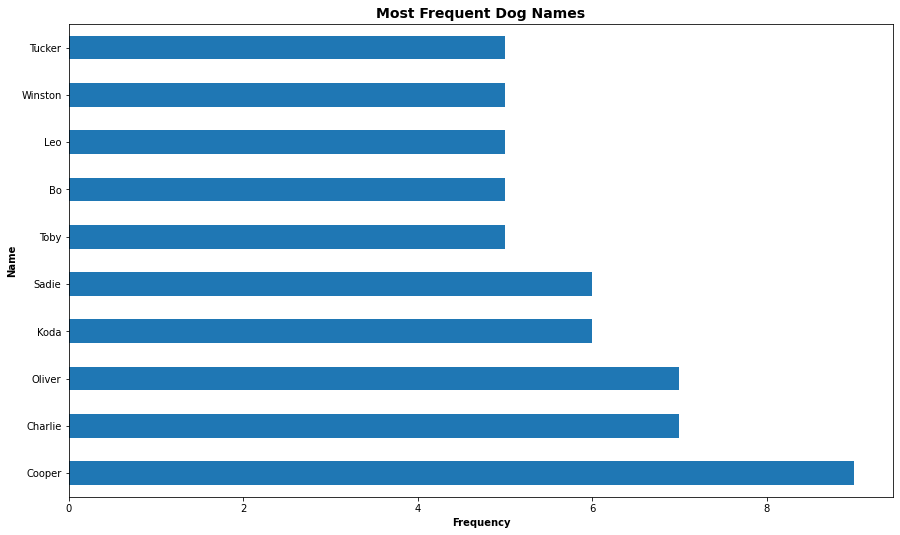

In [92]:
# Plotting the most frequent 10 names in the dataset using a barplot
plt.figure(figsize=(14.78, 8.7))
data.name.value_counts(sort=True, ascending=False)[:10].plot(kind='barh')
plt.xlabel('Frequency'.title(), fontsize=10, weight='bold')
plt.ylabel('Name'.title(), fontsize=10, weight='bold')
plt.title('Most Frequent Dog Names'.title(), fontsize=14, weight='bold');

#### Insight 02 :
- 'pupper' and 'doggo' are the most frequent dog types in the dataset. 

In [93]:
dogs_count = data.groupby('dog_stage')['tweet_id'].count()
dogs_count

dog_stage
doggo           21
doggo pupper     3
floofer          4
pupper          68
puppo           13
Name: tweet_id, dtype: int64

**Insight 03 :**
- The 'doggo' type has the highest values of retweets, with a median of approximately 3000 retweets and a 6200 retweets as a maximum. While 'pupper' dogs are the most frequent and have the lowest number of retweets.

In [94]:
data['retweet_count'].describe()

count      840.000000
mean      2328.996429
std       3704.981526
min         19.000000
25%        602.000000
50%       1337.500000
75%       2737.000000
max      53584.000000
Name: retweet_count, dtype: float64

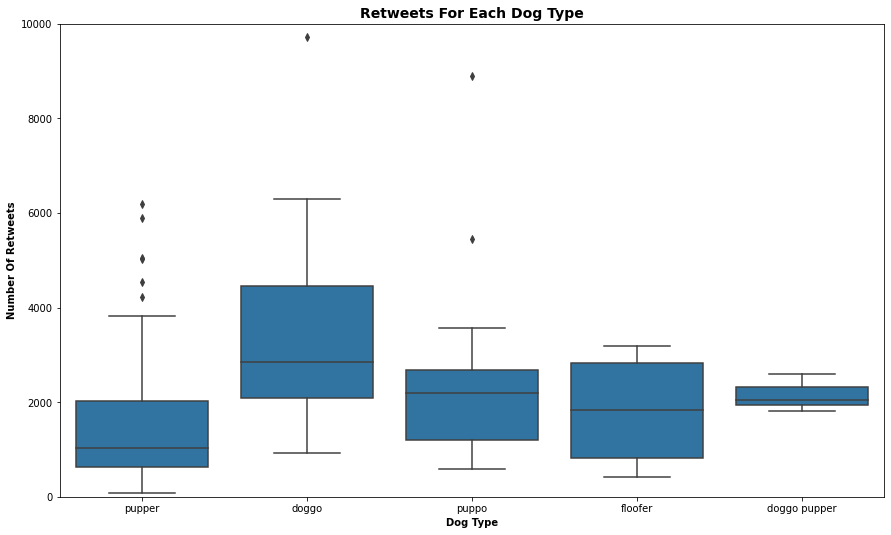

In [95]:
#Plot retweets for each type of dogs 
plt.figure(figsize=(14.78, 8.7))

# list of dog types
dog_types = ['pupper', 'doggo', 'puppo', 'floofer', 'doggo pupper']

# Returns the types for dog_types with the categories and orderedness
# Refer docs - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
dtypes = pd.api.types.CategoricalDtype(ordered=True, categories=dog_types)

# Use pandas.astype() to convert the "dog_stage" column from a plain object type into an ordered categorical type 
data['dog_stage'] = data['dog_stage'].astype(dtypes);
#plot data by using a boxplot
sb.boxplot(data=data, x='dog_stage', y='retweet_count',
             color= base_color)
plt.xlabel('Dog Type'.title(), fontsize=10, weight='bold')
plt.ylabel('Number of Retweets'.title(), fontsize=10, weight='bold')
plt.title('Retweets for each Dog Type'.title(), fontsize=14, weight='bold')
plt.ylim(bottom=0, top=10000);

**Insight 04 :**
- Strong positive relation between favorite_count and retweet_count, the more favorites the more rewteets for each dog. 

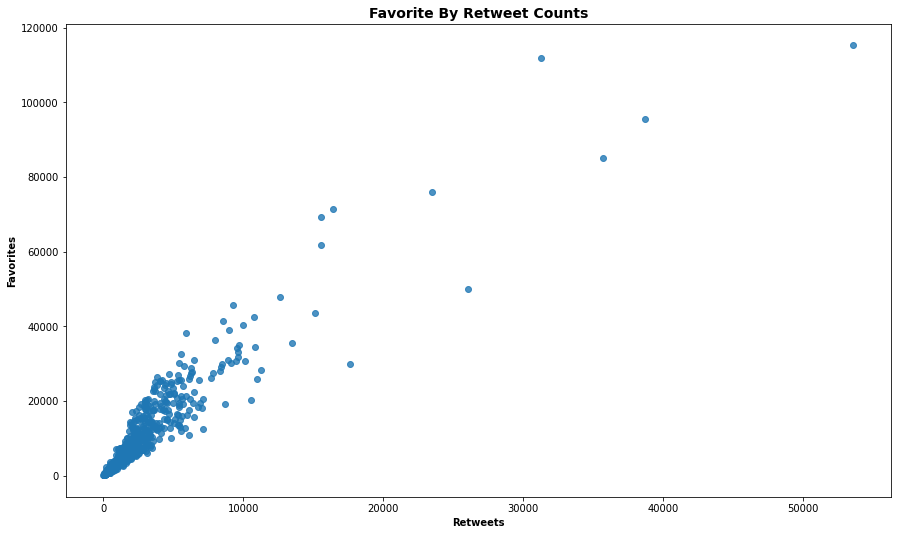

In [96]:
# Plot the realtion between 'favorite_count' and 'retweet_count' using a scatter plot
plt.figure(figsize=(14.78, 8.7))

sb.regplot(x=data['retweet_count'], y=data['favorite_count'], fit_reg=False)
plt.xlabel('Retweets'.title(), fontsize=10, weight='bold')
plt.ylabel('Favorites'.title(), fontsize=10, weight='bold')
plt.title('Favorite by Retweet Counts'.title(), fontsize=14, weight='bold');

In [97]:
corr_coef = data['retweet_count'].corr(data['favorite_count'])
corr_coef

0.9265085700045491

### 5. Resources
- **Archive Dataset : **https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv**
- **Image Predictions Dataset : https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv**